In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
csv_path = "esc50.csv"
df = pd.read_csv(csv_path)
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [3]:
df.info()
print("Colunas:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB
Colunas: ['filename', 'fold', 'target', 'category', 'esc10', 'src_file', 'take']


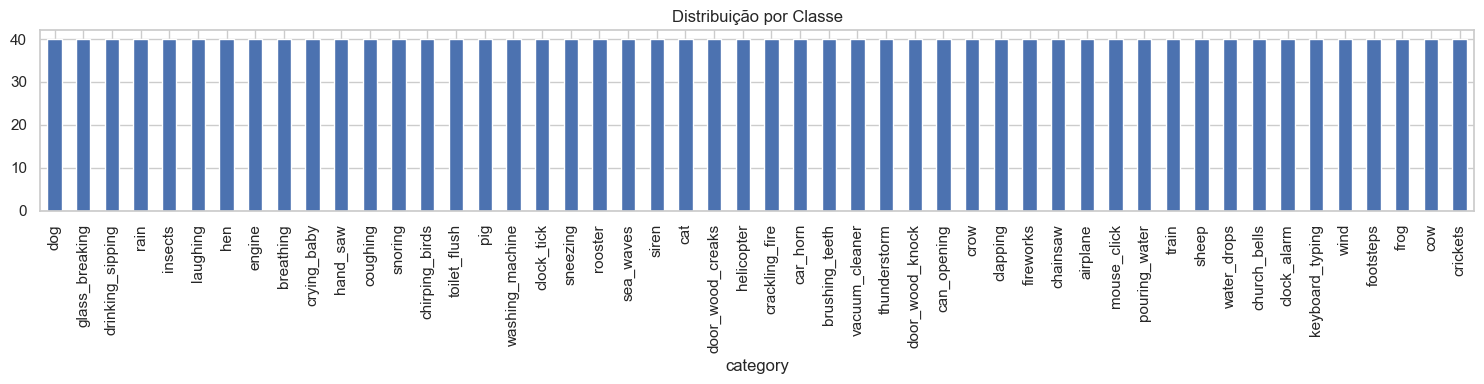

In [4]:
df['category'].value_counts().plot(kind='bar', figsize=(15, 4), title="Distribuição por Classe")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [5]:
print("Valores nulos por coluna:")
print(df.isnull().sum())
print(f"Duplicatas: {df.duplicated().sum()} registros")

Valores nulos por coluna:
filename    0
fold        0
target      0
category    0
esc10       0
src_file    0
take        0
dtype: int64
Duplicatas: 0 registros


In [6]:
import pandas as pd
import os
import shutil 
from sklearn.model_selection import train_test_split

selected_classes = ['dog', 'cat', 'cow', 'rooster', 'sheep']
path_to_esc50_csv = 'esc50.csv'
path_to_esc50_audio = 'audio/'

output_train_path = 'training_data/'
output_test_path = 'testing_data/'

test_set_size = 0.20

print("Iniciando a organização do dataset...")

df_meta = pd.read_csv(path_to_esc50_csv)
print(f"Arquivo meta.csv carregado. Total de {len(df_meta)} registros.")

df_filtered = df_meta[df_meta['category'].isin(selected_classes)]
print(f"Foram encontrados {len(df_filtered)} arquivos de áudio para as classes selecionadas: {selected_classes}")

for animal_class in selected_classes:
    os.makedirs(os.path.join(output_train_path, animal_class), exist_ok=True)
    os.makedirs(os.path.join(output_test_path, animal_class), exist_ok=True)

    class_files = df_filtered[df_filtered['category'] == animal_class]['filename'].tolist()
    train_files, test_files = train_test_split(class_files, test_size=test_set_size, random_state=42)
        
    print(f" -> Separando {len(train_files)} para treino e {len(test_files)} para teste.")

    for filename in train_files:
        source = os.path.join(path_to_esc50_audio, filename)
        destination = os.path.join(output_train_path, animal_class, filename)
        shutil.copy(source, destination)
        
    for filename in test_files:
        source = os.path.join(path_to_esc50_audio, filename)
        destination = os.path.join(output_test_path, animal_class, filename)
        shutil.copy(source, destination)

print("\nConcluído! Dados divididos e organizados com sucesso.")
print(f"Pasta de treino: '{output_train_path}'")
print(f"Pasta de teste:  '{output_test_path}'")

Iniciando a organização do dataset...
Arquivo meta.csv carregado. Total de 2000 registros.
Foram encontrados 200 arquivos de áudio para as classes selecionadas: ['dog', 'cat', 'cow', 'rooster', 'sheep']
 -> Separando 32 para treino e 8 para teste.
 -> Separando 32 para treino e 8 para teste.
 -> Separando 32 para treino e 8 para teste.
 -> Separando 32 para treino e 8 para teste.
 -> Separando 32 para treino e 8 para teste.

Concluído! Dados divididos e organizados com sucesso.
Pasta de treino: 'training_data/'
Pasta de teste:  'testing_data/'


In [7]:
pip install numpy pandas librosa scikit-learn matplotlib tensorflow


  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached grpcio-1.71.0-cp312-cp312-macosx_10_14_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached numpy-2.1.3-cp312-cp312-macosx_14_0

In [9]:
import librosa
import numpy as np
import os

def extract_mfcc_from_directory(directory_path, label, n_mfcc=40):
    features = []
    labels = []
    
    for file in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file)
        try:
            audio, sr = librosa.load(file_path, sr=None)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
            mfcc_mean = np.mean(mfcc.T, axis=0)
            features.append(mfcc_mean)
            labels.append(label)
        except Exception as e:
            print(f"[Erro] {file_path}: {e}")
    
    return features, labels

# Para todas as classes:
classes = ['dog', 'cat', 'cow', 'rooster', 'sheep']
X_train, y_train = [], []
X_test, y_test = [], []

for class_label in classes:
    print(f"[Treinamento] Processando classe: {class_label}")
    f_train, l_train = extract_mfcc_from_directory(f"training_data/{class_label}", class_label)
    f_test, l_test = extract_mfcc_from_directory(f"testing_data/{class_label}", class_label)

    X_train.extend(f_train)
    y_train.extend(l_train)
    X_test.extend(f_test)
    y_test.extend(l_test)

print("Concluído!")


[Treinamento] Processando classe: dog
[Treinamento] Processando classe: cat
[Treinamento] Processando classe: cow
[Treinamento] Processando classe: rooster
[Treinamento] Processando classe: sheep
Concluído!


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# model = models.Sequential([
#     layers.Input(shape=(40,)),  # MFCC de 40 dimensões
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(len(classes), activation='softmax')
# ])

model = models.Sequential([
    layers.Reshape((40, 1), input_shape=(40,)),
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(np.array(X_train), np.array(y_train_encoded),
          validation_split=0.2,
          epochs=30,
          batch_size=32,
          verbose=1)


/Users/danielnegreiroscangianelli/miniforge3/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 40, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 38, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,821 (42.27 KB)

 Trainable params: 10,821 (42.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1602 - loss: 1.7963 - val_accuracy: 0.0000e+00 - val_loss: 3.1609
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4083 - loss: 1.3860 - val_accuracy: 0.0000e+00 - val_loss: 4.0373
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5135 - loss: 1.2407 - val_accuracy: 0.0000e+00 - val_loss: 4.4438
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5958 - loss: 1.1342 - val_accuracy: 0.0000e+00 - val_loss: 4.7750
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6810 - loss: 1.0378 - val_accuracy: 0.0000e+00 - val_loss: 5.1764
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7089 - loss: 0.9270 - val_accuracy: 0.0000e+00 - val_loss: 5.7484
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6845 - loss: 0.9183 - val_accuracy: 0.0000e+00 - val_loss: 6.0521
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7484 - loss: 0.8272 - val_accuracy: 0.000

In [16]:
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test_encoded), verbose=0)
print(f"Acurácia no conjunto de teste: {test_acc:.2%}")


Acurácia no conjunto de teste: 70.00%


In [19]:
import os
import pickle
from tensorflow.keras.models import load_model

# Caminhos de saída
MODEL_OUTPUT_PATH = "export/animal_sounds_model.h5"
ENCODER_OUTPUT_PATH = "export/label_encoder.pkl"

# Cria pasta se não existir
os.makedirs("export", exist_ok=True)

# Salvar o modelo
def export_model(model, path=MODEL_OUTPUT_PATH):
    model.save(path)
    print(f"✅ Modelo salvo com sucesso em: {path}")

# Salvar o encoder
def export_encoder(encoder, path=ENCODER_OUTPUT_PATH):
    with open(path, 'wb') as f:
        pickle.dump(encoder, f)
    print(f"✅ LabelEncoder salvo com sucesso em: {path}")

export_model(model)
export_encoder(encoder)
print("🏁 Exportação concluída.")

✅ Modelo salvo com sucesso em: export/animal_sounds_model.h5
✅ LabelEncoder salvo com sucesso em: export/label_encoder.pkl
🏁 Exportação concluída.
